In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("kaggle/archive/fraudTrain.csv")
test = pd.read_csv("kaggle/archive/fraudTest.csv")
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
print(test.shape),print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

In [5]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [8]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [9]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [10]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [11]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              int6

In [12]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [13]:
totalcat=total.select_dtypes(include=['object'])

In [14]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


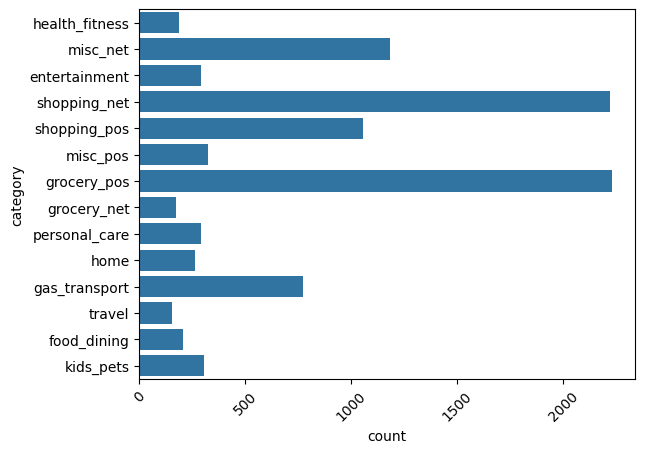

In [15]:
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

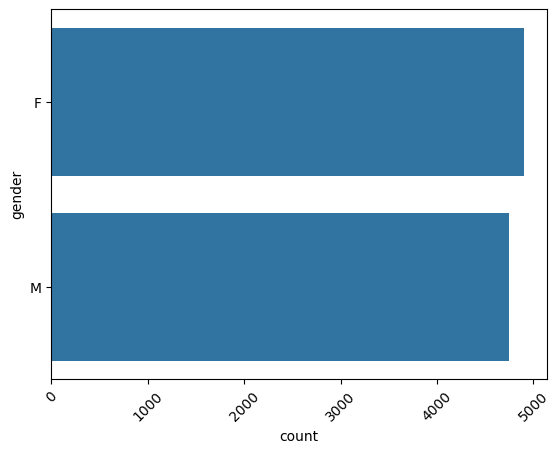

In [16]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

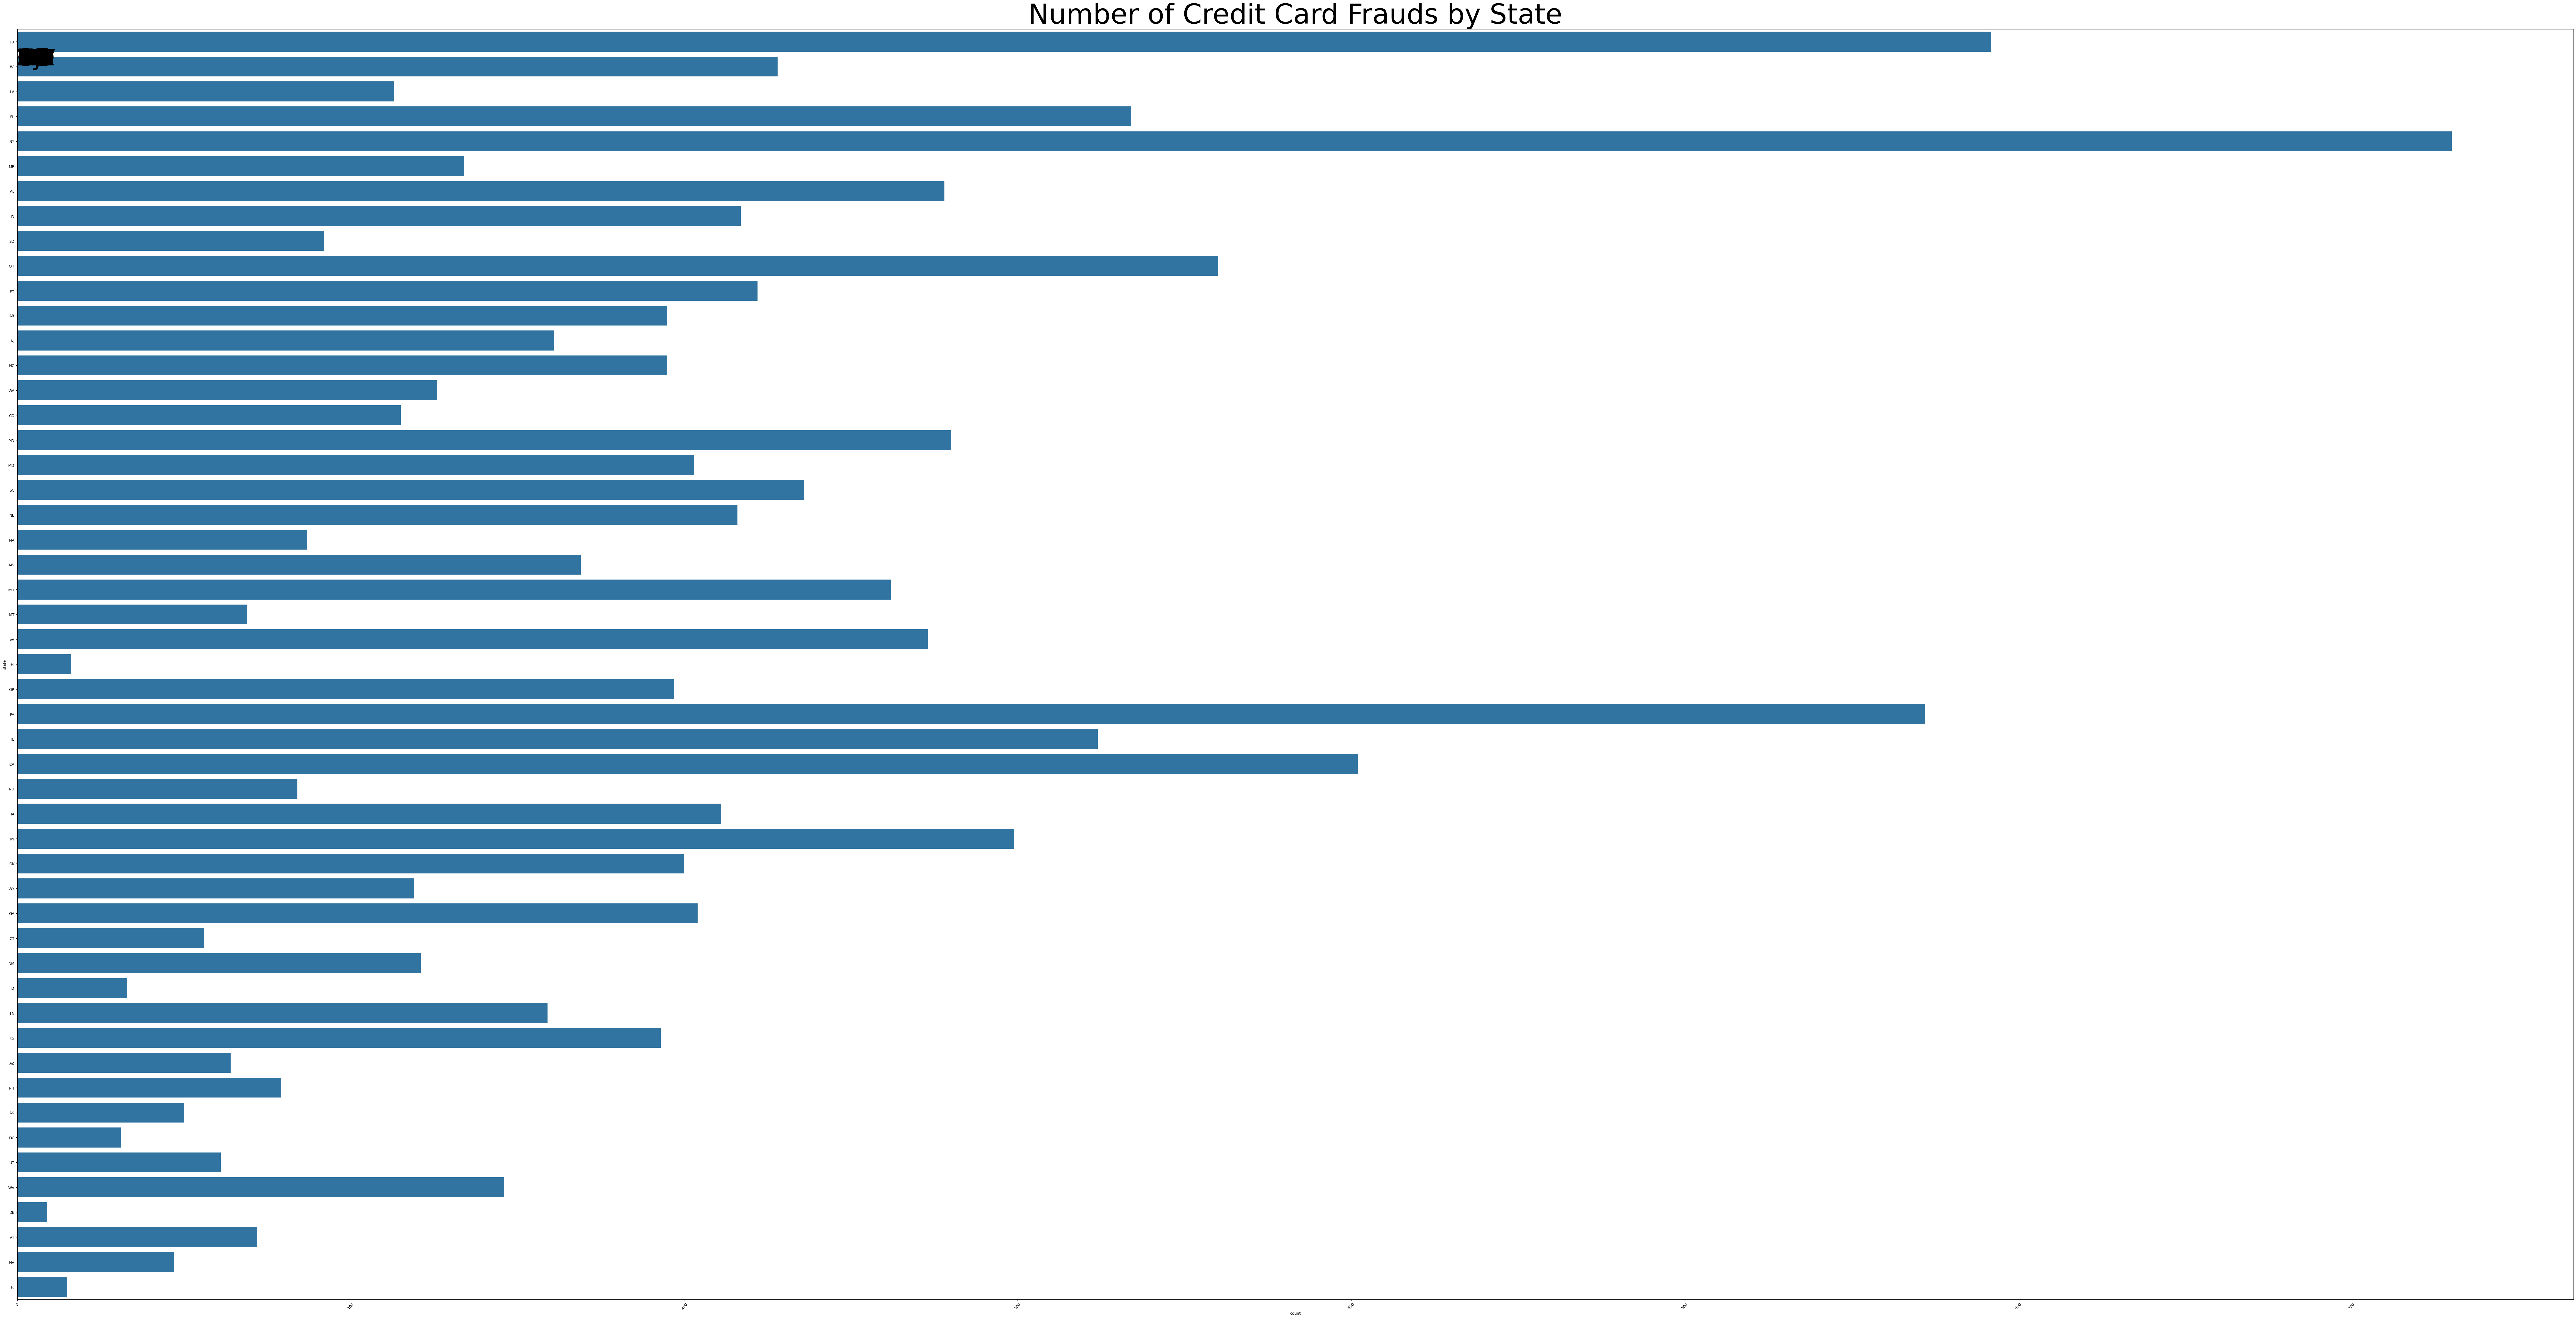

In [17]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

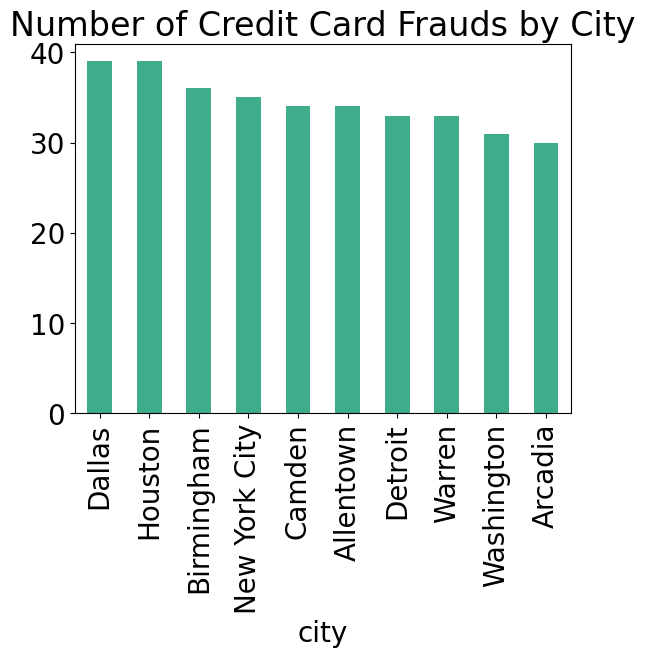

In [18]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

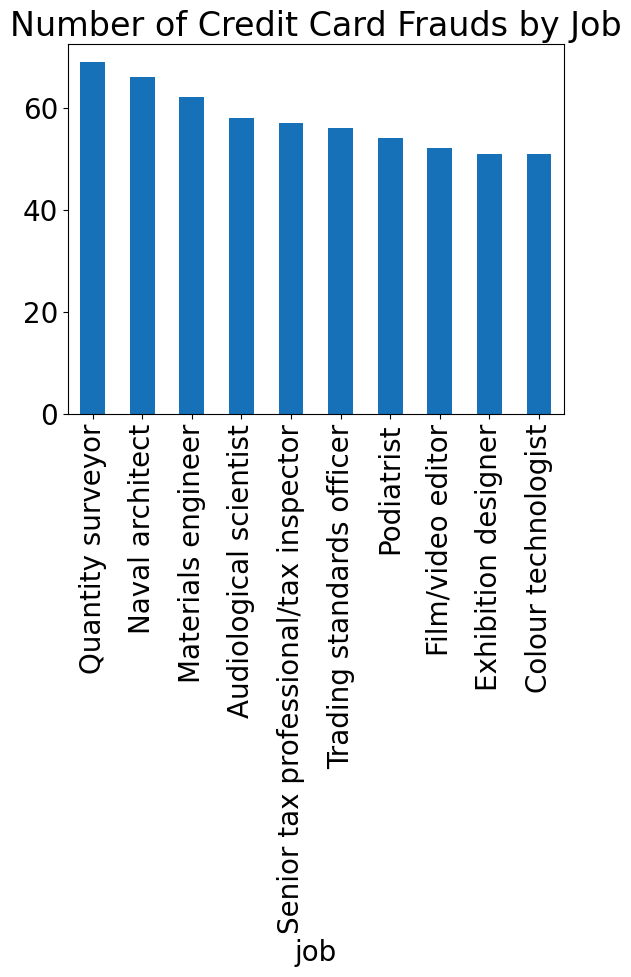

In [19]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

In [20]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [21]:
#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [22]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [23]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(5)
memory usage: 155.5 MB


C:\Users\Saksham\AppData\Local\Temp\ipykernel_6040\3831546736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['amt'],fit = norm,color = randomcolor())


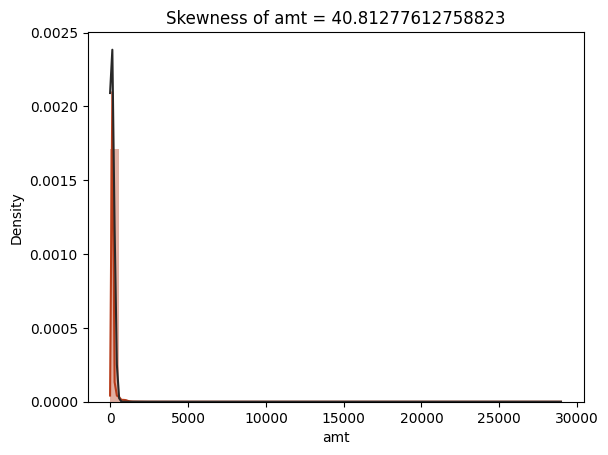

In [24]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

C:\Users\Saksham\AppData\Local\Temp\ipykernel_6040\1458263499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['city_pop'],fit = norm,color = randomcolor())


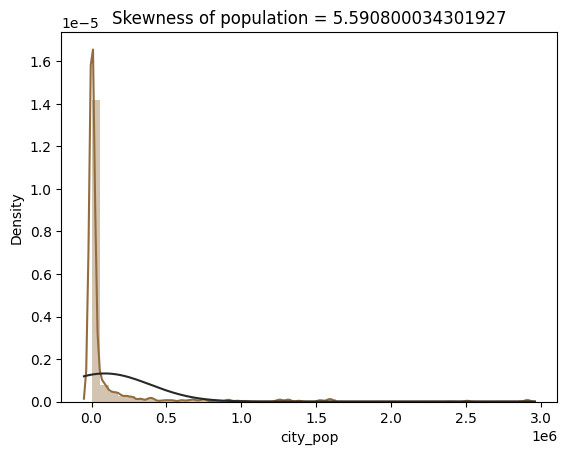

In [25]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

C:\Users\Saksham\AppData\Local\Temp\ipykernel_6040\3201600023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())


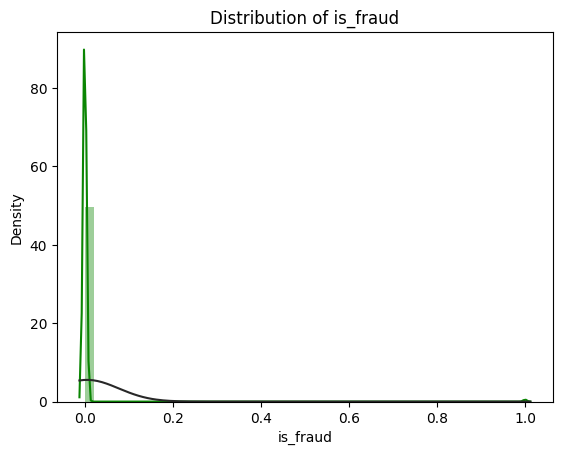

In [26]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()

In [27]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(5)
memory usage: 226.1+ MB


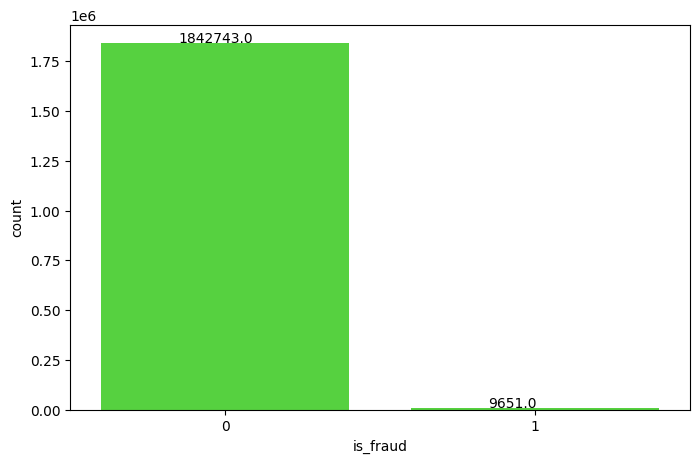

In [28]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [29]:
total["age"] = (total["trans_date"] - total["dob"]).dt.days // 365
total["age"].head()

0    52
1    30
2    49
3    32
4    65
Name: age, dtype: int64

In [30]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    int64         
dtypes: datetime64[ns](3), float64(5), int64(3), object(5)
memory usage: 240.3+ MB


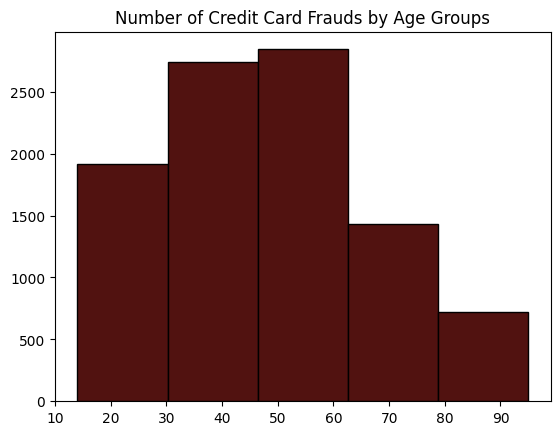

In [31]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [32]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [33]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

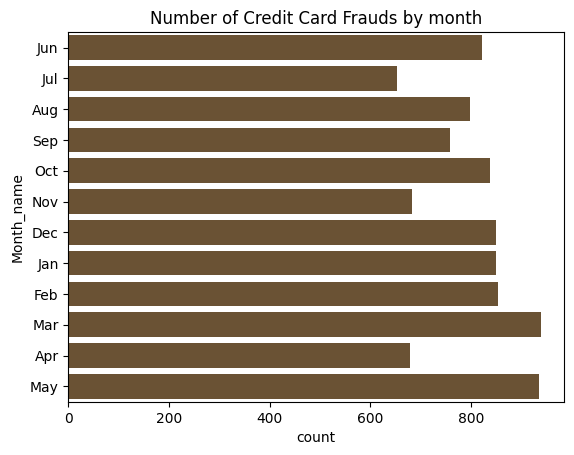

In [34]:
sns.countplot(total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

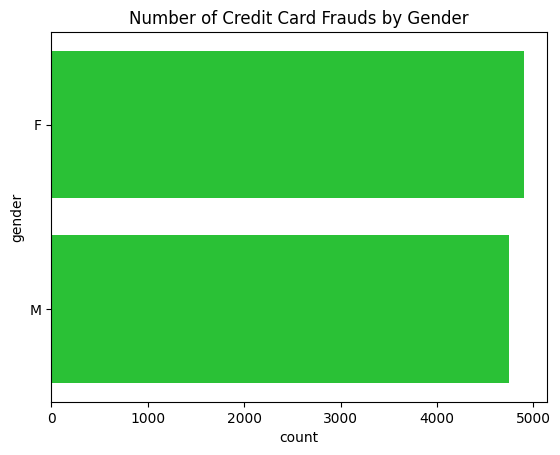

In [35]:
sns.countplot(total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

In [36]:
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

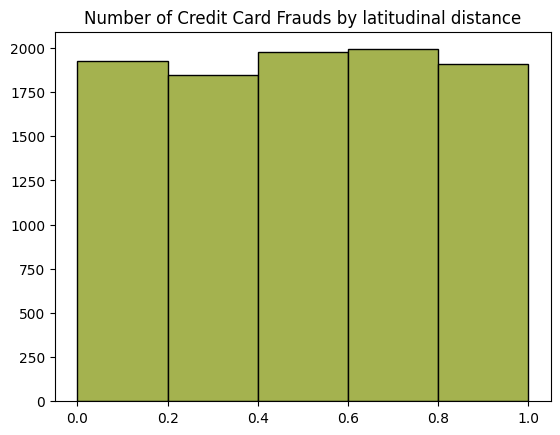

In [37]:
fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

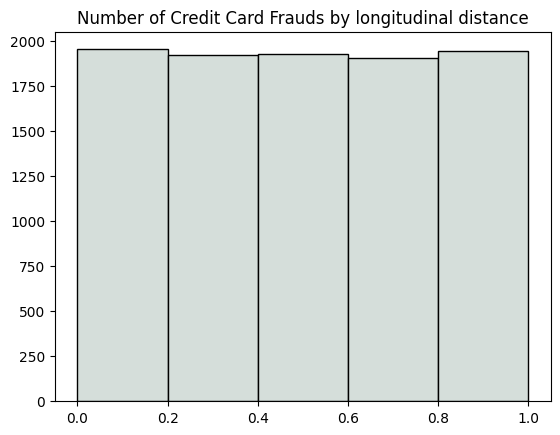

In [38]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [39]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    int64         
 16  trans_month            int32         
 17  trans_year             int32         
 18  latitudinal_distance   floa

In [40]:
total.gender.value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

In [41]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

gender
0    1014749
1     837645
Name: count, dtype: int64

In [42]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   category               object 
 1   amt                    float64
 2   gender                 int64  
 3   city_pop               int64  
 4   is_fraud               int64  
 5   age                    int64  
 6   trans_month            int32  
 7   trans_year             int32  
 8   latitudinal_distance   float64
 9   longitudinal_distance  float64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 141.3+ MB


In [43]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   age                      int64  
 5   trans_month              int32  
 6   trans_year               int32  
 7   latitudinal_distance     float64
 8   longitudinal_distance    float64
 9   category_food_dining     bool   
 10  category_gas_transport   bool   
 11  category_grocery_net     bool   
 12  category_grocery_pos     bool   
 13  category_health_fitness  bool   
 14  category_home            bool   
 15  category_kids_pets       bool   
 16  category_misc_net        bool   
 17  category_misc_pos        bool   
 18  category_personal_care   bool   
 19  category_shopping_net    bool   
 20  category_shopping_pos    bool   
 21  category_trav

In [44]:
total.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020,0.265,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30,6,2020,0.870,0.476,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49,6,2020,0.177,0.660,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32,6,2020,0.243,0.064,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,65,6,2020,0.706,0.868,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.utils import resample

In [47]:
#create two different dataframe of majority and minority class 
df_majority = total[(total['is_fraud']==0)] 
df_minority = total[(total['is_fraud']==1)] 

df_majority.shape,df_minority.shape

((1842743, 22), (9651, 22))

In [48]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 22)

In [49]:
# Combine majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(3685486, 22)

In [50]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['amt',
 'gender',
 'city_pop',
 'age',
 'trans_month',
 'trans_year',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [51]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685486 entries, 909017 to 1296674
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   age                      int64  
 4   trans_month              int32  
 5   trans_year               int32  
 6   latitudinal_distance     float64
 7   longitudinal_distance    float64
 8   category_food_dining     bool   
 9   category_gas_transport   bool   
 10  category_grocery_net     bool   
 11  category_grocery_pos     bool   
 12  category_health_fitness  bool   
 13  category_home            bool   
 14  category_kids_pets       bool   
 15  category_misc_net        bool   
 16  category_misc_pos        bool   
 17  category_personal_care   bool   
 18  category_shopping_net    bool   
 19  category_shopping_pos    bool   
 20  category_travel          bool   
dtypes: bool(

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.3, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

In [54]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [55]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [56]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
0,amt,4.027159
9,category_gas_transport,0.821667
11,category_grocery_pos,0.700186
17,category_personal_care,0.484026
14,category_kids_pets,0.465310
16,category_misc_pos,0.454852
10,category_grocery_net,0.395407
20,category_travel,0.378806
12,category_health_fitness,0.358054
8,category_food_dining,0.325290


In [57]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

c:\Users\Saksham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-train and Y-train is :  67.95 %


c:\Users\Saksham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-test and Y-test is :  67.92 %
 Mean absolute error is  0.17728097419969863
 Mean squared  error is  0.17728097419969863
 Median absolute error is  0.0
Accuracy is  82.27 %
F1 score:  82.18 %


In [58]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

In [59]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_train_vif_adj = X_train_new
#x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new

In [61]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

In [62]:
Logit2=LogisticRegression(solver='liblinear')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  82.34 %
Score of the model with X-test and Y-test is :  82.17 %
 Mean absolute error is  0.17829757444968825
 Mean squared  error is  0.17829757444968825
 Median absolute error is  0.0
Accuracy is  82.17 %
F1 score:  82.06 %


In [63]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[410600 142232]
 [ 54902 497912]]
Outcome values : 
 410600 142232 54902 497912
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.74      0.81    552832
           0       0.78      0.90      0.83    552814

    accuracy                           0.82   1105646
   macro avg       0.83      0.82      0.82   1105646
weighted avg       0.83      0.82      0.82   1105646



In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

amt -  0.7281817756956825
gender -  0.0037972176221339506
city_pop -  0.02128895658368162
age -  0.026697583024108025
trans_month -  0.006363677671339839
trans_year -  0.0015340923717081765
latitudinal_distance -  0.01201642885767493
longitudinal_distance -  0.011845818351159007
category_food_dining -  0.014707377603978914
category_gas_transport -  0.07416727189845915
category_grocery_net -  0.026121764769852465
category_grocery_pos -  0.0012803490921376411
category_health_fitness -  0.003190827032997798
category_home -  0.01613243084701128
category_kids_pets -  0.0034800424592676756
category_misc_net -  0.0023285415149992875
category_misc_pos -  0.01357339170672595
category_personal_care -  0.0045996447575494355
category_shopping_net -  0.007911878453837623
category_shopping_pos -  0.004238825585885195
category_travel -  0.01654210409980957


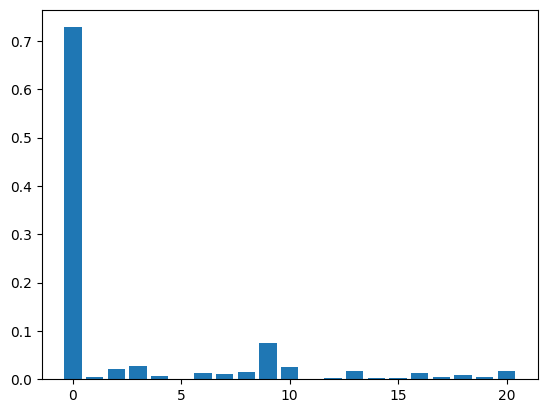

In [65]:
importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [66]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.999014151003124
 Mean absolute error is  0.0009858489968760345
 Mean squared  error is  0.0009858489968760345
 Median absolute error is  0.0
Accuracy score  99.9 %
F1 score:  99.9 %


In [67]:
#Normal Randomised Search takes too much time to execute on a dataset this large.
"""dtc1 = DecisionTreeClassifier()


params_dtc = {  
    "splitter":["best"],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
}
random_search=RandomizedSearchCV(estimator=dtc1,param_distributions = params_dtc, scoring = 'f1',cv=5,n_iter=100)
random_search.fit(X_train,Y_train)"""

'dtc1 = DecisionTreeClassifier()\n\n\nparams_dtc = {  \n    "splitter":["best"],\n    \'max_depth\': [10, 20, 50, 100, 200],\n    \'min_samples_leaf\': [10, 20, 50, 100, 200],\n    \'min_samples_split\' : [10, 20, 50, 100, 200],\n    \'criterion\': ["gini", "entropy"]\n}\nrandom_search=RandomizedSearchCV(estimator=dtc1,param_distributions = params_dtc, scoring = \'f1\',cv=5,n_iter=100)\nrandom_search.fit(X_train,Y_train)'

In [68]:
dtc2 = DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 20, max_depth= 200, criterion= 'gini')
dtc2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=200, min_samples_leaf=20,
                       min_samples_split=100)

In [69]:
print("Score the X-train with Y-train is : ", dtc2.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc2.score(X_test,Y_test))

Y_pred=dtc2.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9970370255519723
Score the X-test  with Y-test  is :  0.9965034016312635
 Mean absolute error is  0.003496598368736467
 Mean squared  error is  0.003496598368736467
 Median absolute error is  0.0
Accuracy score  99.65 %
F1 score:  99.65 %
